In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


In [10]:
#mount drive and import dataset

from google.colab import drive
drive.mount('/content/drive')
df_oscar=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/actor-metrics.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         265 non-null    int64  
 1   film         265 non-null    object 
 2   actor        265 non-null    object 
 3   characters   265 non-null    object 
 4   imdb         263 non-null    object 
 5   gender       265 non-null    object 
 6   race         265 non-null    object 
 7   race_simple  265 non-null    object 
 8   words        265 non-null    float64
 9   sentences    265 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 20.8+ KB


In [12]:
df_oscar.sort_values(by='year')

,year,film,actor,characters,imdb,gender,race,race_simple,words,sentences
0,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0
27,1989,driving-miss-daisy,Dan Aykroyd,BOOLIE,http://www.imdb.com/name/nm0000101/,male,White/Caucasian,White,2040.0,326.0
28,1989,driving-miss-daisy,Esther Rolle,IDELLA,http://www.imdb.com/name/nm0738354/,female,Black/African American,POC,188.0,34.0
29,1989,driving-miss-daisy,Jessica Tandy,DAISY + |. DAISY,http://www.imdb.com/name/nm0001788/,female,White/Caucasian,White,3826.0,613.0
30,1989,driving-miss-daisy,Morgan Freeman,HOKE,http://www.imdb.com/name/nm0000151/,male,Black/African American,POC,3343.0,510.0
...,...,...,...,...,...,...,...,...,...,...
193,2017,get-out,Allison Williams,ROSE,http://www.imdb.com/name/nm4129745/,female,White/Caucasian,White,1151.0,253.0
192,2017,dunkirk,Tom Hardy,FARRIER,http://www.imdb.com/name/nm0362766/,male,White/Caucasian,White,163.0,30.0
191,2017,dunkirk,Tom Glynn-Carney,PETER,http://www.imdb.com/name/nm6077951/,male,White/Caucasian,White,231.0,51.0
201,2017,get-out,Lil Rel Howery,ROD,http://www.imdb.com/name/nm2577076/,male,Black/African American,POC,837.0,131.0


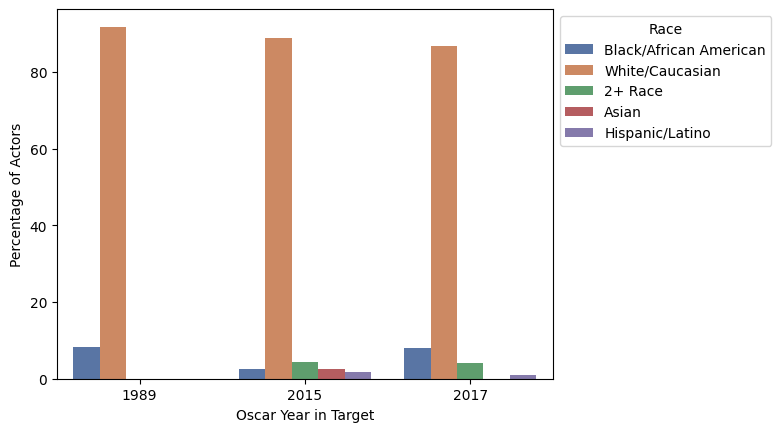

In [13]:
# to count the number of each race per year
race_counts_per_year = df_oscar.groupby(['year', 'race'])['actor'].count()

#to count the total number of actors per year
total_actors_per_year = df_oscar.groupby('year')['actor'].count()

#to calculate percentage of each race in the respective years
race_percentages = (race_counts_per_year / total_actors_per_year) * 100

#Pandas function to convert series to dataframe
percentage_race_df = race_percentages.to_frame().reset_index()

#Bar plot
g=sns.barplot(data=percentage_race_df,x='year',y='actor',hue='race',palette='deep')
sns.move_legend(g, loc='upper left',bbox_to_anchor=(1, 1),title='Race') #to position legend to outside box
plt.xlabel('Oscar Year in Target')
plt.ylabel('Percentage of Actors')
plt.show()

While there is a slight improvement when compared to 1989 where we can see only White/Caucasian and Black/African American race nominees, there is still a significant gap in diversity. The neatly organised plot makes it easy to find the missing bars showing the absence of certain races across the years.

Now, to know further about their screen presence,I analysed the average number of words spoken by actors of each race,differentiated by gender. A line plot as in Figure 2 makes it easy to see the trends in the average word count over the years. Color palette ‘dark’ which is another seaborn categorical palette is used to differentiate the genders.

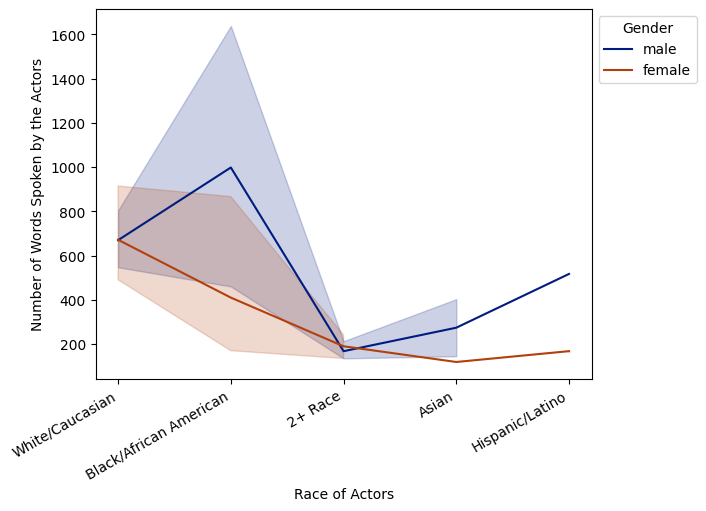

In [14]:
#Line plot
g=sns.lineplot(data=df_oscar,x='race',y='words',hue='gender',palette='dark')
sns.move_legend(g, loc='upper left',bbox_to_anchor=(1, 1),title='Gender') # position legend outside the box
plt.xlabel('Race of Actors')
plt.ylabel('Number of Words Spoken by the Actors')
plt.xticks(rotation=30,ha='right') # to prevent overlapping and ensure readability, considering the longer racial category names
plt.show()

Though percentage of nominees is low for Black/African American, this plot shows that average number of words spoken by them is higher than other races.

To delve deeper,below boxplot(Figure 3) focuses specifically on Black/African American male nominees and analyzes the distribution of words spoken by them within their respective films. A boxplot is a great choice as it effectively reveals the distribution of data points

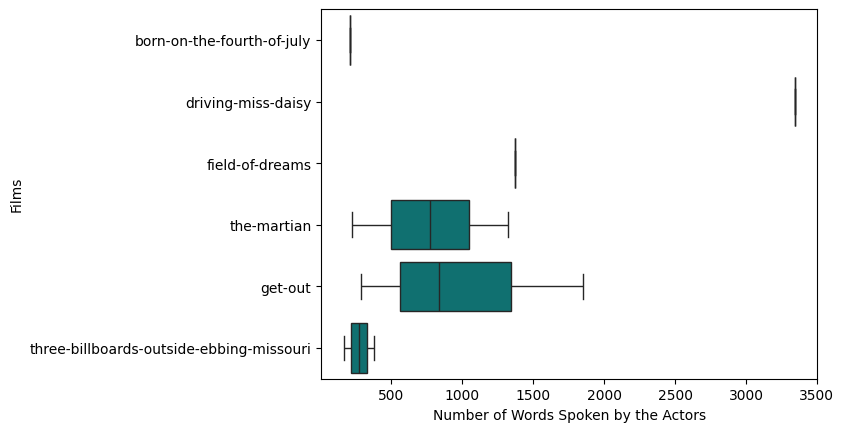

In [15]:
# filter dataset for Black/African American race and male gender
race_data = df_oscar[(df_oscar['race'] == 'Black/African American')&(df_oscar['gender'] == 'male')]

#boxplot
sns.boxplot(y="film", x="words", data=race_data,color='teal')
plt.ylabel('Films')
plt.xlabel('Number of Words Spoken by the Actors')
plt.show()

"Driving Miss Daisy" and "Get Out" have Black/African American male characters with a higher number of spoken words,consequently impacting the word counts. "Get Out" shows a wider spread of spoken words with whiskers suggesting the importance of all Black/African American actors in the film. "Driving Miss Daisy" has a single Black/African American male nominee with significant screen presence represented by the single line within the box.

Figure 4 utilizes an interactive sunburst chart, a visually engaging way to explore the specific films contributing to the trends in the above plots. This chart uses race as the central category, with individual films branching out as subcategories. Plotly Express simplifies the process with its px.sunburst function. We've chosen "color" to represent the average number of sentences spoken by each race across their films. The color intensity is calculated by weighting the number of words spoken. Sector "width" corresponds to the total number of sentences spoken by them (Sunburst Charts in Python,n.d.))

In [16]:
# This code has a reference from 'Sunburst of a rectangular DataFrame with continuous color argument in px.sunburst' (plotly,n.d.)

fig = px.sunburst(df_oscar, path=['race','film'], values='words',color='sentences',color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_oscar['sentences'], weights=df_oscar['words']))

fig.update_layout(width=800, height=600) #to increase chart dimensions for a better look
fig.show()

Races like 2+Race , Asian & Hispanic/Latino races appear reddish on the scale indicating lower number of sentences. White/Caucasian and Black/African American races have varied range on the scale, but the number of films by Black/African American is not even half that of white race.

To conclude on the analysis of Oscar diversity Figure 5 utilises a facetgrid with histograms to see the distribution of sentences spoken across years for both White and People of Color (POC) actors.

The facetgrid layout provides a clear and organized comparison between White and POC actors. This allows viewers to easily identify trends within each group. Additionally, using color for gender within each histogram helps to differentiate the data for male and female nominees within each race (seaborn.FacetGrid,n.d.).In general, multi panel figures are very useful when datasets contain more information that cannot be plotted in a single plot (Wilke,2019).

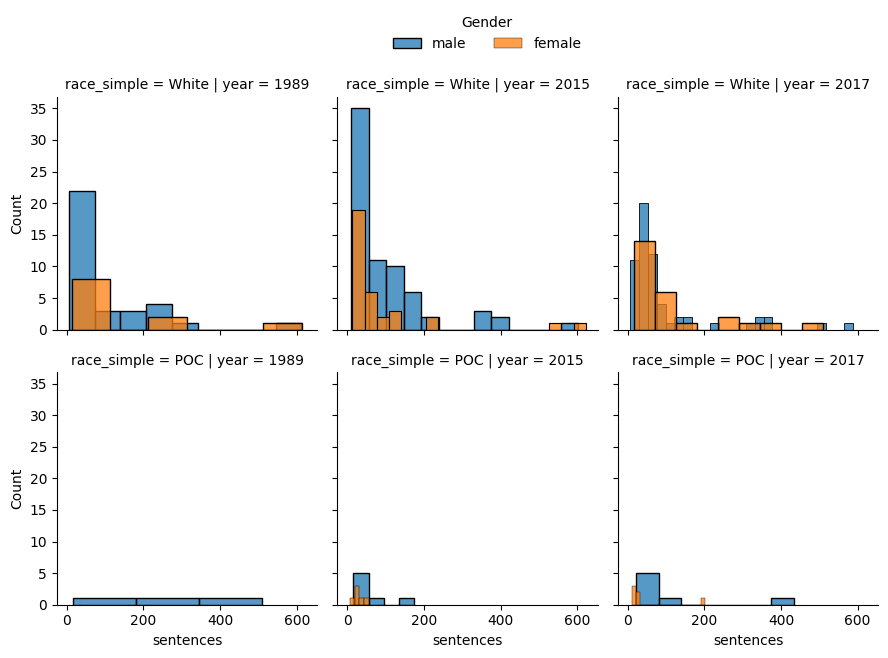

In [17]:
#initialise a grid with columns and rows
g = sns.FacetGrid(data=df_oscar, col='year', row='race_simple',hue='gender')
#to draw a plot on every facet
g.map_dataframe(sns.histplot,x='sentences',stat='count', common_norm=False)
g.add_legend(title='Gender')
sns.move_legend(g, loc='lower center',bbox_to_anchor=(0.5, 1),ncols=2) #position legend at the top
plt.show()

The histograms clearly show that POC actors have a significantly lower number of sentences spoken compared to White actors across the years. Furthermore, the trend of fewer female nominees compared to males holds true for both White and POC actors.These findings demand a continued push for greater diversity and fairness both on screen and behind the scenes. Future research on the recent years' nominees can bring more input to these visualisations.